In [26]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
#import matplotlib.mlab as mlab

In [27]:
import numpy as np
import pandas as pd

In [28]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [29]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [30]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [31]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [32]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [33]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [34]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [35]:
inspector = inspect(engine)

In [36]:
inspector.get_table_names()

['measurement', 'station']

In [37]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [38]:
engine.execute('SELECT * FROM Measurement LIMIT 12').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0)]

# Exploratory Climate Analysis

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
ppt_list = session.query(Measurement.date).order_by(Measurement.date)
ppt_list

#Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
ppt_list=session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date).all()
ppt_list

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

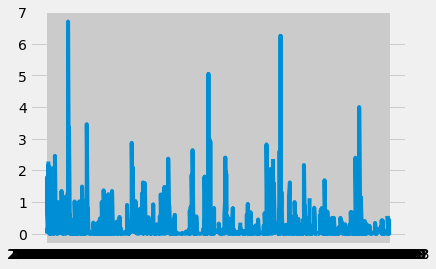

In [40]:
# Save the query results as a Pandas DataFrame and set the index to the date column

ppt_df=pd.DataFrame(ppt_list)
#ppt_df=pd.DataFrame(ppt_list, columns=['Date', 'Precipitation'])
#ppt_df
#ppt_df['Date'] = pd.to_datetime(ppt_df['Date'])
#ppt_df.set_index(ppt_df['Date'],inplace = True)
#ppt_df.sort_index()
#ppt_df.head(12)
#plt.plot(rot=90)
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(ppt_df.date,ppt_df.prcp)

In [41]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

![precipitation](Images/precipitation.png)

In [42]:
# Use Pandas to calcualte the summary statistics for the precipitation data
ppt_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [43]:
# Design a query to show how many stations are available in this dataset?
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [44]:
session.query(func.count(Station.id)).all()

[(9)]

In [45]:
# What are the most active stations? (i.e. what stations have the most rows)?
#List the stations and the counts in descending order.
most_active= session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
tobs=session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
              filter(Measurement.station== 'USC00519281').all()
tobs             

[(54.0, 85.0, 71.66378066378067)]

In [47]:
# Choose the station with the highest number of temperature observations.
highstation_temp=session.query(func.max(Measurement.tobs),Measurement.date).\
filter(Measurement.station == most_active[0][0]).all()
highstation_temp
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#session.query
#filter(station)
#df.plot.hist(bins=12)
#plt.tight_layout

[(85.0, '2015-09-10')]

In [48]:
station_df=pd.DataFrame(highstation_temp)
plt.figure(figsize=(8,6))
plt.hist(['tobs'],bins = 12)
plt.legend(['Tobs'])
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()

AssertionError: 1 columns passed, passed data had 2 columns

![precipitation](Images/station-histogram.png)

In [49]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [50]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
prev_start_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_end_year = dt.date(2017, 8, 28) - dt.timedelta(days=365)
print(prev_start_year)
print(prev_end_year)
# for your trip using the previous year's data for those same dates.

2016-08-23
2016-08-28


In [51]:
# for your trip using the previous year's data for those same dates.
triptemp = calc_temps('2017-08-23', '2017-08-28')
print(triptemp)

[(76.0, 80.25, 82.0)]


In [61]:
tmin = {triptemp [0][0]}
tmax = {triptemp [0][2]}
tavg = {triptemp [0][1]}
print(tmin, tmax, tavg)


{76.0} {82.0} {80.25}


(0, 103)

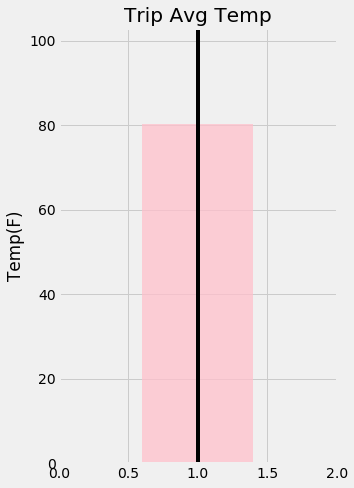

In [72]:
# Plot the results from your previous query as a bar chart. 
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
error = tmax - tmin
xpos = 1
# Use the average temperature for the y value
height = tavg
plt.figure(figsize=(5,7))
plt.bar(xpos,height,yerr=error,alpha = 0.75,color = 'pink')
# Use "Trip Avg Temp" as your Title
plt.ylabel('Temp(F)')
plt.title('Trip Avg Temp')

plt.tight_layout()
plt.xlim(0,2)
plt.ylim(0,103)


In [83]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall = session.query(Station.name, Station.station, func.sum(Measurement.tobs),Station.latitude,Station.longitude,Station.elevation).\
    filter(Station.station==Measurement.station).\
    group_by(Station.name).\
    all()
    
rainfall

[('HONOLULU OBSERVATORY 702.2, HI US',
  'USC00511918',
  141728.0,
  21.3152,
  -157.9992,
  0.9),
 ('KANEOHE 838.1, HI US', 'USC00513117', 196915.0, 21.4234, -157.8015, 14.6),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'USC00514830',
  164871.0,
  21.5213,
  -157.8374,
  7.0),
 ('MANOA LYON ARBO 785.2, HI US',
  'USC00516128',
  185230.0,
  21.3331,
  -157.8025,
  152.4),
 ('PEARL CITY, HI US', 'USC00517948', 102467.0, 21.3934, -157.9751, 11.9),
 ('UPPER WAHIAWA 874.3, HI US',
  'USC00518838',
  37162.0,
  21.4992,
  -158.0111,
  306.6),
 ('WAIHEE 837.5, HI US',
  'USC00519281',
  198652.0,
  21.45167,
  -157.84888999999998,
  32.9),
 ('WAIKIKI 717.2, HI US', 'USC00519397', 203083.0, 21.2716, -157.8168, 3.0),
 ('WAIMANALO EXPERIMENTAL FARM, HI US',
  'USC00519523',
  198957.0,
  21.33556,
  -157.71139,
  19.5)]

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
